Covid19 Data Analysis Notebook
------------------------------------------

### Import the modules 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [3]:
covid_csv = pd.read_csv("covid19.csv")
covid_csv.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035


#### Let's check the shape of the dataframe

In [4]:
covid_csv.shape

(268, 289)

### Delete the useless columns

In [5]:
covid_csv.drop(["Lat", "Long"], axis=1, inplace=True)

In [6]:
covid_csv.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501
1,NaN,Albania,0,0,0,0,0,0,0,0,...,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825
4,NaN,Angola,0,0,0,0,0,0,0,0,...,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035


### Aggregating the rows by the country

In [7]:
covid_aggregated = covid_csv.groupby("Country/Region").sum()

In [9]:
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501
Albania,0,0,0,0,0,0,0,0,0,0,...,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202
Algeria,0,0,0,0,0,0,0,0,0,0,...,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272
Andorra,0,0,0,0,0,0,0,0,0,0,...,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825
Angola,0,0,0,0,0,0,0,0,0,0,...,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035


In [10]:
covid_aggregated.shape

(190, 285)

### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

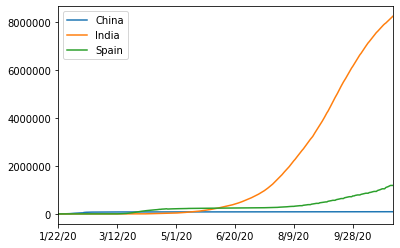

In [11]:
covid_aggregated.loc["China"].plot()
covid_aggregated.loc["India"].plot()
covid_aggregated.loc["Spain"].plot()
plt.legend()

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

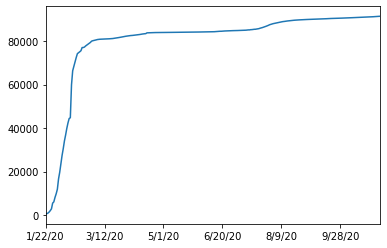

In [12]:
covid_aggregated.loc['China'].plot()

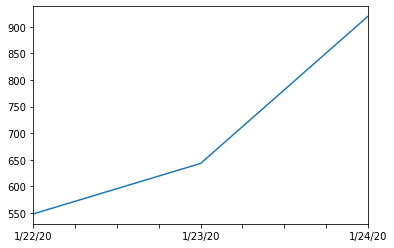

In [13]:
covid_aggregated.loc["China"][:3].plot()

### Calculating the first derivative of the curve

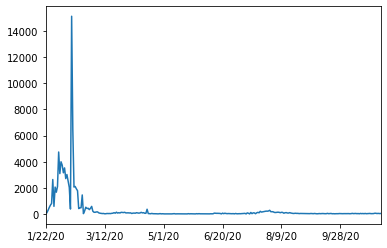

In [14]:
covid_aggregated.loc["China"].diff().plot()

### Find maxmimum infection rate for China

In [15]:
covid_aggregated.loc["China"].diff().max()

15136.0

In [16]:
covid_aggregated.loc["India"].diff().max()

97894.0

In [17]:
covid_aggregated.loc["Spain"].diff().max()

52188.0

In [18]:
covid_aggregated.loc["US"].diff().max()

99321.0

### Find maximum infection rate for all of the countries. 

In [19]:
#Creating a loop to find the max infection rate per country and appending it to the empty list created
countries = list(covid_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_aggregated.loc[c].diff().max())
    
#Adding the max_infection_rates(list) to covid_aggregated
covid_aggregated["max_infection_rate"] = max_infection_rates


In [20]:
covid_aggregated.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40768,40833,40937,41032,41145,41268,41334,41425,41501,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,18858,19157,19445,19729,20040,20315,20634,20875,21202,327.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,55880,56143,56419,56706,57026,57332,57651,57942,58272,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,4038,4038,4325,4410,4517,4567,4665,4756,4825,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,9026,9381,9644,9871,10074,10269,10558,10805,11035,355.0


### Create a new dataframe with only needed column 

In [21]:
covid_data = pd.DataFrame(covid_aggregated["max_infection_rate"])

In [22]:
covid_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,327.0
Algeria,675.0
Andorra,299.0
Angola,355.0


### World Happiness Report
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Importing the dataset

In [44]:
happiness_report = pd.read_csv("2020.csv")

In [45]:
happiness_report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


### Let's drop the useless columns 

In [46]:
happiness_report.drop(["Ladder score","Regional indicator","Generosity","Perceptions of corruption","Standard error of ladder score","upperwhisker","lowerwhisker",], axis=1, inplace=True)

In [47]:
happiness_report.head(6)

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,10.639267,0.954330,71.900825,0.949172,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,10.774001,0.955991,72.402504,0.951444,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,10.979933,0.942847,74.102448,0.921337,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,10.772559,0.974670,73.000000,0.948892,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,11.087804,0.952487,73.200783,0.955750,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,10.812712,0.939139,72.300919,0.908548,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117


### Changing the indices of the dataframe

In [48]:
happiness_report.set_index("Country name", inplace=True)

In [49]:
happiness_report.head(6)

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,
Finland,10.639267,0.954330,71.900825,0.949172,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
Denmark,10.774001,0.955991,72.402504,0.951444,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
Switzerland,10.979933,0.942847,74.102448,0.921337,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
Iceland,10.772559,0.974670,73.000000,0.948892,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
Norway,11.087804,0.952487,73.200783,0.955750,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
Netherlands,10.812712,0.939139,72.300919,0.908548,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117


### Now let's join two dataset we have prepared  

#### Corona Dataset :

In [50]:
covid_data.head(4)

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,327.0
Algeria,675.0
Andorra,299.0


In [51]:
covid_data.shape

(190, 1)

#### wolrd happiness report Dataset :

In [52]:
happiness_report.head(4)

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,
Finland,10.639267,0.954330,71.900825,0.949172,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
Denmark,10.774001,0.955991,72.402504,0.951444,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
Switzerland,10.979933,0.942847,74.102448,0.921337,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
Iceland,10.772559,0.974670,73.000000,0.948892,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688


In [53]:
happiness_report.shape

(153, 12)

In [54]:
# Used inner join got to merge the two datasets
data = covid_data.join(happiness_report, how="inner")
data.head(6)

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Afghanistan,915.0,7.462861,0.470367,52.590000,0.396573,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
Albania,327.0,9.417931,0.671070,68.708138,0.781994,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
Algeria,675.0,9.537965,0.803385,65.905174,0.466611,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
Argentina,18326.0,9.810955,0.900568,68.803802,0.831132,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
Armenia,2474.0,9.100476,0.757479,66.750656,0.712018,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162
Australia,716.0,10.720596,0.944855,73.604538,0.915432,1.972317,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996,2.129804


### Correlation matrix 

In [55]:
data.corr()

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
max_infection_rate,1.000000e+00,2.080226e-01,1.354519e-01,2.230490e-01,9.401502e-02,5.547422e-17,2.080226e-01,1.354519e-01,2.230490e-01,9.401502e-02,-8.995823e-02,3.291646e-02,-3.580100e-03
Logged GDP per capita,2.080226e-01,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-1.972453e-15,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-1.375368e-01,3.386514e-01,-4.925589e-02
Social support,1.354519e-01,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-1.731505e-15,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-7.137585e-02,2.245086e-01,1.619174e-02
Healthy life expectancy,2.230490e-01,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,3.229268e-15,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-8.597477e-02,3.614685e-01,-6.974693e-03
Freedom to make life choices,9.401502e-02,4.407609e-01,4.868377e-01,4.787323e-01,1.000000e+00,-2.971206e-15,4.407609e-01,4.868376e-01,4.787323e-01,1.000000e+00,2.298333e-01,4.289070e-01,7.963506e-02
Ladder score in Dystopia,5.547422e-17,-1.972453e-15,-1.731505e-15,3.229268e-15,-2.971206e-15,1.000000e+00,-3.117433e-16,-4.378770e-16,-2.670086e-15,8.669193e-16,-5.965371e-16,1.496259e-16,5.590675e-16
Explained by: Log GDP per capita,2.080226e-01,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-3.117433e-16,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-1.375368e-01,3.386514e-01,-4.925590e-02
Explained by: Social support,1.354519e-01,7.888766e-01,1.000000e+00,7.649773e-01,4.868376e-01,-4.378770e-16,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-7.137585e-02,2.245085e-01,1.619174e-02
Explained by: Healthy life expectancy,2.230490e-01,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-2.670086e-15,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-8.597476e-02,3.614685e-01,-6.974702e-03
Explained by: Freedom to make life choices,9.401502e-02,4.407609e-01,4.868377e-01,4.787323e-01,1.000000e+00,8.669193e-16,4.407609e-01,4.868377e-01,4.787323e-01,1.000000e+00,2.298333e-01,4.289070e-01,7.963507e-02


### Visualization of the results
The analysis is not finished unless we visualize the results in terms figures and graphs.

In [56]:
data.head(5)

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Afghanistan,915.0,7.462861,0.470367,52.590000,0.396573,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
Albania,327.0,9.417931,0.671070,68.708138,0.781994,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
Algeria,675.0,9.537965,0.803385,65.905174,0.466611,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
Argentina,18326.0,9.810955,0.900568,68.803802,0.831132,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
Armenia,2474.0,9.100476,0.757479,66.750656,0.712018,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162


### Plotting GDP vs maximum Infection rate

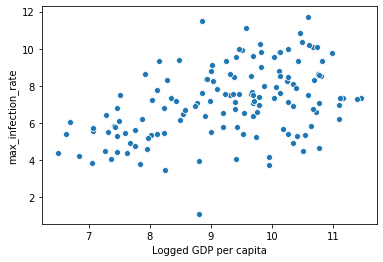

In [59]:
x = data["Logged GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

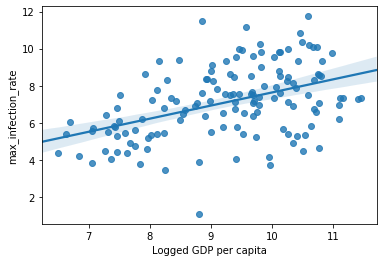

In [60]:
sns.regplot(x, np.log(y))

### Plotting Social support vs maximum Infection rate

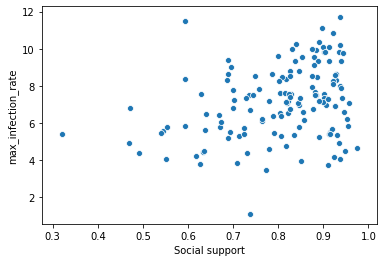

In [61]:
x = data["Social support"] 
y = np.log(data["max_infection_rate"]) 
sns.scatterplot(x,y)

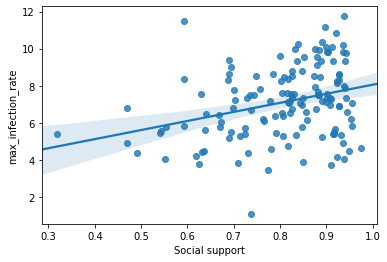

In [62]:
sns.regplot(x,y)

### Plotting Healthy life expectancy vs maximum Infection rate

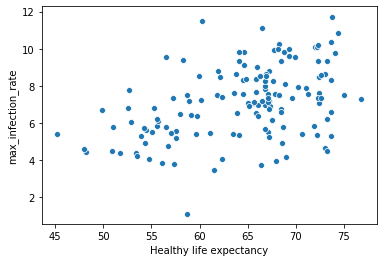

In [63]:
x = data["Healthy life expectancy"] 
y = np.log(data["max_infection_rate"]) 
sns.scatterplot(x,y)

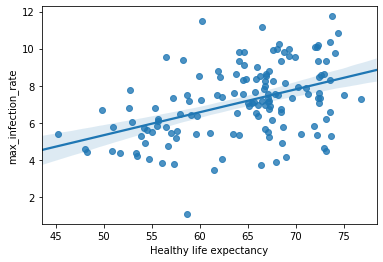

In [64]:
sns.regplot(x,y)

### Plotting Freedom to make life choices vs maximum Infection rate

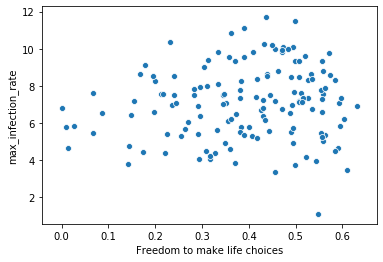

In [42]:
x = data["Freedom to make life choices"]
y = y = np.log(data["max_infection_rate"]) 
sns.scatterplot(x,y)


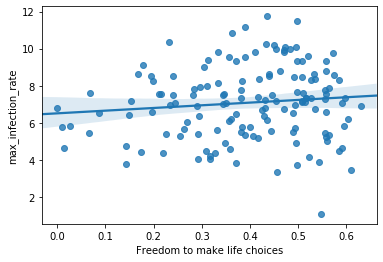

In [43]:
sns.regplot(x,y)

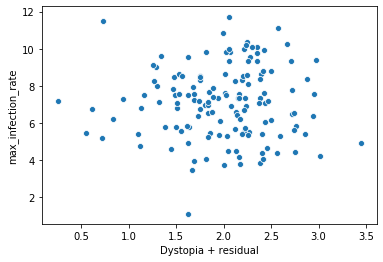

In [65]:
x = data["Dystopia + residual"]
y = y = np.log(data["max_infection_rate"]) 
sns.scatterplot(x,y)

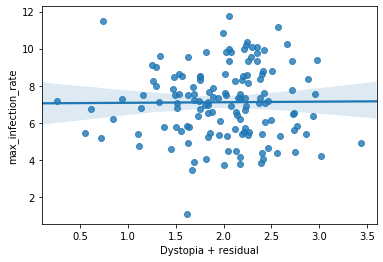

In [66]:
sns.regplot(x,y)